## FF Coding
Build and train a neural network with dense layers using the Keras library in Python on the Fashin MNIST dataset.


### Import Required Libraries

In [ ]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 10

### Load the Fashion MNIST dataset

In [ ]:
train_df = pd.read_csv('../Silver_Exc/MNIST_FASHION/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('../Silver_Exc/MNIST_FASHION/fashion-mnist_test.csv', sep = ',')

# Explore data

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocess the Data

In [ ]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32')

In [ ]:
x_train = train_data[:, 1:] / 255
y_train = train_data[:,0]
x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

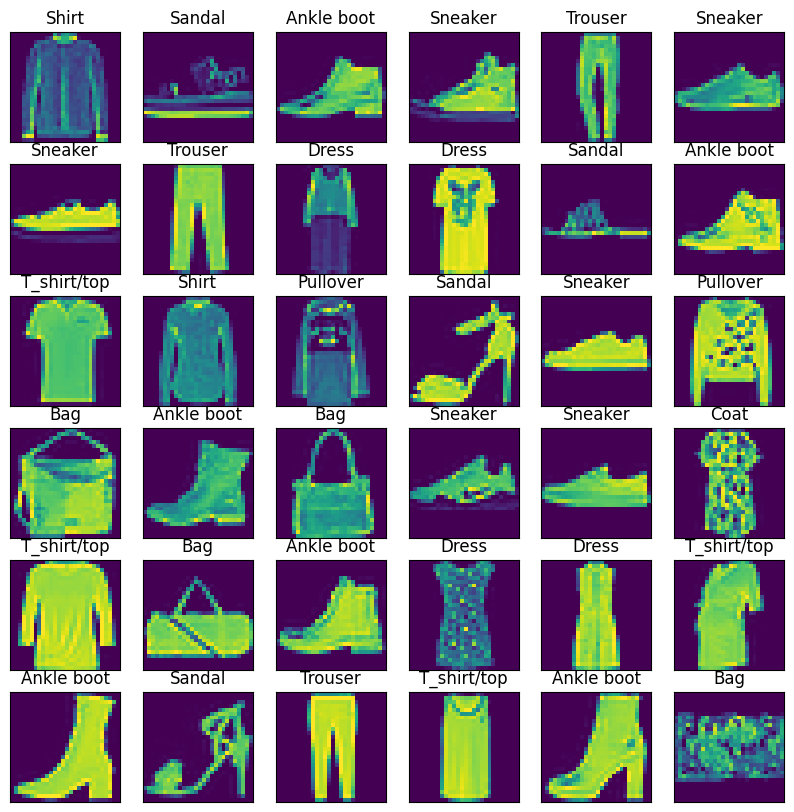

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28, 28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

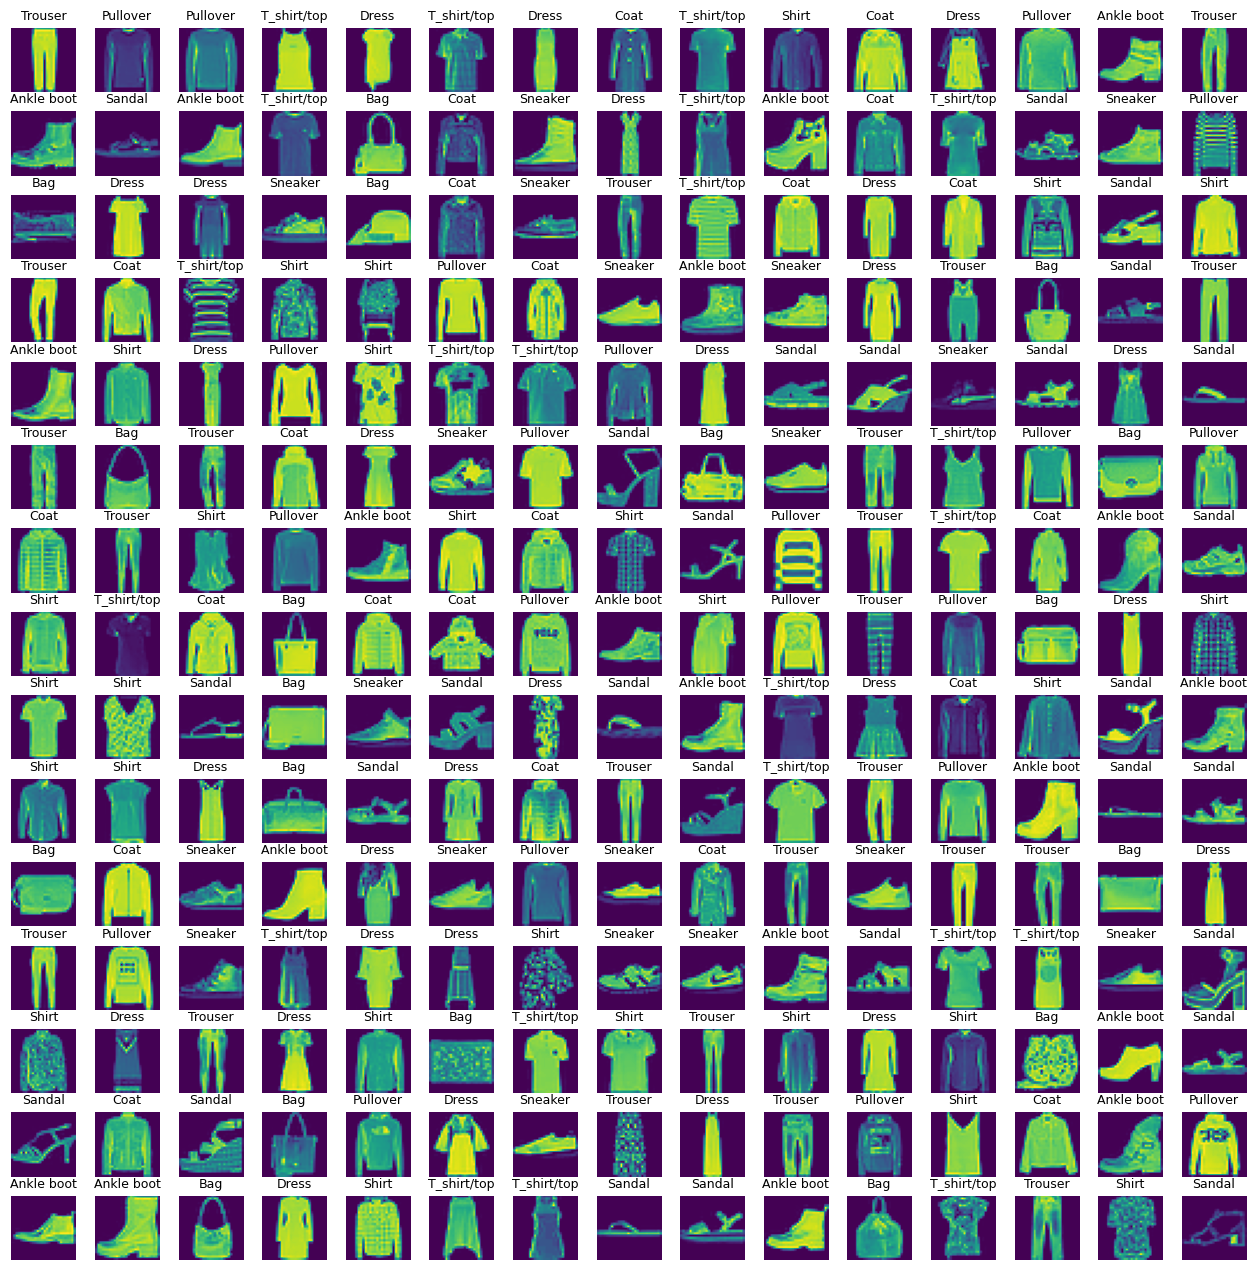

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16, 16))
# flaten the 15 x 15 matrix into 225 array
axes = axes.ravel()
# get the length of the train dataset
n_train = len(train_data)

# Select a random number from 0 to n_train
# Create evenly spaces variables
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index, 1:].reshape((28, 28)) )
    labelindex = int(train_data[index, 0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.3)

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

## Build the Neural Network

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)), # Flatten the input image
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

## Compile the Model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Train the Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
12/12 [==============================] - 2s 52ms/step - loss: 1.6498 - accuracy: 0.4773 - val_loss: 1.0698 - val_accuracy: 0.6572
Epoch 2/10
12/12 [==============================] - 0s 19ms/step - loss: 0.8771 - accuracy: 0.7139 - val_loss: 0.7271 - val_accuracy: 0.7498
Epoch 3/10
12/12 [==============================] - 0s 18ms/step - loss: 0.6684 - accuracy: 0.7704 - val_loss: 0.6128 - val_accuracy: 0.7893
Epoch 4/10
12/12 [==============================] - 0s 18ms/step - loss: 0.5830 - accuracy: 0.7992 - val_loss: 0.5539 - val_accuracy: 0.8057
Epoch 5/10
12/12 [==============================] - 0s 18ms/step - loss: 0.5345 - accuracy: 0.8163 - val_loss: 0.5256 - val_accuracy: 0.8192
Epoch 6/10
12/12 [==============================] - 0s 20ms/step - loss: 0.5061 - accuracy: 0.8261 - val_loss: 0.4953 - val_accuracy: 0.8325
Epoch 7/10
12/12 [==============================] - 0s 18ms/step - loss: 0.4819 - accuracy: 0.8327 - val_loss: 0.4758 - val_accuracy: 0.8359
Epoch 8/10
12

## Evaluate the Model

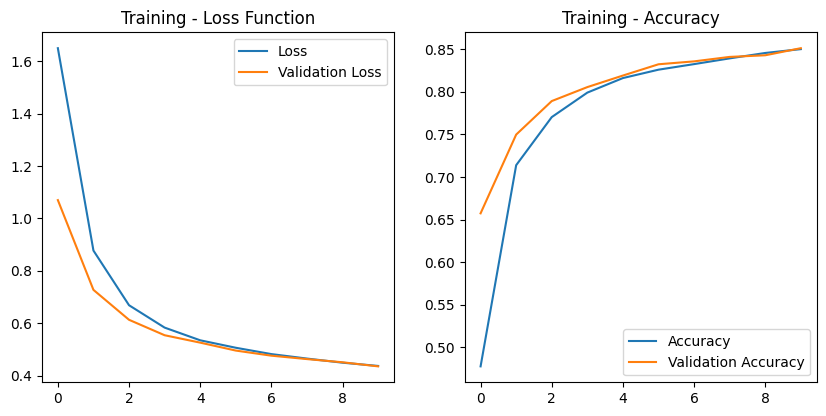

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

plt.show()

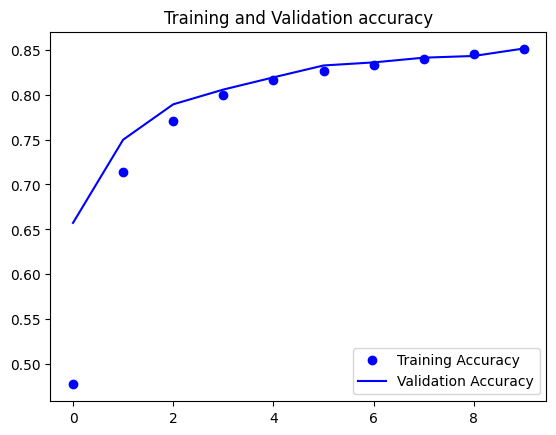

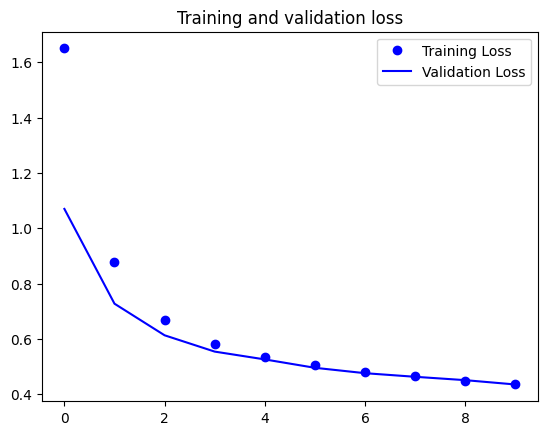

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Get the predictions for the test data
predictions = model.predict(x_test)

# Convert the predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
y_true = y_test

# Find indices of correct and incorrect predictions
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# Print a classification report
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.80      0.80      0.80      1000
     Class 1       0.96      0.96      0.96      1000
     Class 2       0.79      0.74      0.76      1000
     Class 3       0.83      0.90      0.86      1000
     Class 4       0.75      0.84      0.79      1000
     Class 5       0.95      0.92      0.93      1000
     Class 6       0.69      0.57      0.62      1000
     Class 7       0.90      0.91      0.90      1000
     Class 8       0.94      0.96      0.95      1000
     Class 9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Make predictions

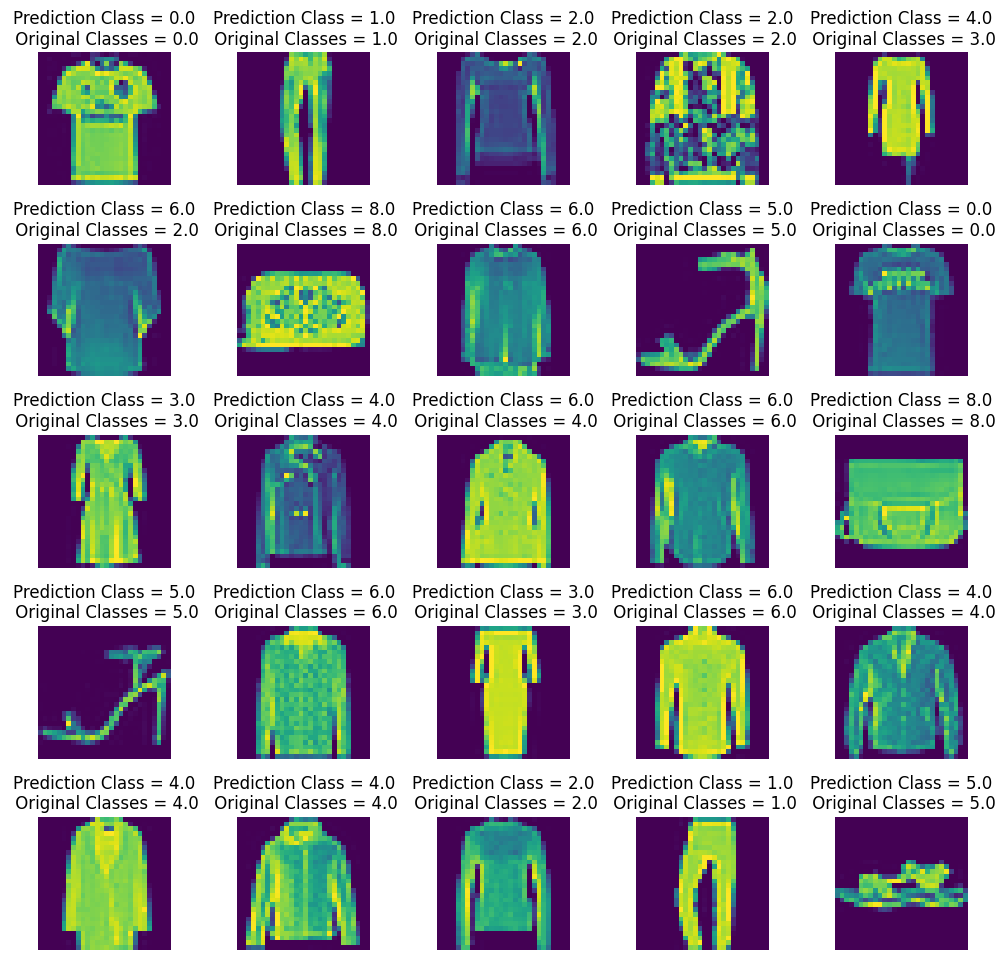

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Classes = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)